## **1) Importing Python Packages for GAN**


In [1]:
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Dropout

# Import LeakyReLU directly from keras.layers
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
!mkdir generated_images

# **LOGIKA PENJELASAN**
Potongan kode di atas berfungsi untuk **mengimpor library dan menyiapkan direktori kerja** yang dibutuhkan dalam proyek *deep learning*, khususnya pada implementasi **Generative Adversarial Network (GAN)**. Library **Keras** digunakan untuk membangun arsitektur jaringan saraf tiruan melalui kelas-kelas seperti `Sequential`, `Dense`, `Conv2D`, dan `Conv2DTranspose`, yang berperan dalam membentuk generator maupun discriminator. Lapisan **LeakyReLU** diimpor untuk mengatasi masalah *dying ReLU* dengan memberikan gradien kecil pada nilai negatif, sementara **Dropout** membantu mencegah *overfitting*. Optimizer **Adam** digunakan untuk mempercepat proses konvergensi selama pelatihan model dengan pengaturan *learning rate* adaptif. Selain itu, library **NumPy** digunakan untuk pengolahan data numerik seperti manipulasi vektor laten. Baris terakhir `!mkdir generated_images` digunakan untuk membuat folder bernama **generated_images**, yang berfungsi sebagai tempat penyimpanan hasil gambar yang dihasilkan oleh generator selama proses pelatihan.


## **2) Parameters for Neural Networks & Data**

In [2]:
img_width = 32
img_height = 32
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(learning_rate=0.0002)

# **LOGIKA PENJELASAN**
Kode di atas digunakan untuk **mendefinisikan parameter dasar** dalam membangun model *Generative Adversarial Network (GAN)*. Variabel `img_width`, `img_height`, dan `channels` menentukan ukuran serta format gambar yang akan diproses, yaitu **32x32 piksel dengan 3 saluran warna (RGB)**. Variabel `img_shape` menyatukan ketiga nilai tersebut menjadi satu bentuk tuple yang akan digunakan sebagai **input shape** pada model *discriminator*. Selanjutnya, `latent_dim = 100` menetapkan **dimensi ruang laten** yang berfungsi sebagai input acak bagi *generator* untuk menghasilkan gambar baru. Terakhir, `adam = Adam(learning_rate=0.0002)` mendefinisikan **optimizer Adam** dengan *learning rate* kecil agar proses pelatihan stabil dan konvergen saat memperbarui bobot model generator maupun discriminator.


## **3) Building Generator**





In [3]:
def build_generator():
    model = Sequential()

    # Create first layer, to receive the input
    model.add(Dense(256 * 4 * 4, input_dim = latent_dim))
    # 256 * 8 * 8; for upscaling the layers,
    # initial shape to construct into final shape

    # Create default activation function
    model.add(LeakyReLU(alpha = 0.2))

    # Create reshape layer
    model.add(Reshape((4, 4,256)))
    # 8,8,256 ; reffers to first layer

    # Adding more layers for neurons and better result
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    # (4,4) >> filter size
    # strides = (2,2) >> Convolutional layers, that how NN understand images

    # Create Final output layer and forming image shape
    # the shape (3, (3,3)) reffers to image shape :
    #    >>>  img_shape = (img_width, img_height, channels)
    model.add(Conv2D(3, (3,3), activation= 'tanh', padding = 'same'))

    #
    model.summary()
    return model

generator = build_generator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

# **LOGIKA PENJELASAN**
Kode di atas berfungsi untuk **membangun arsitektur generator** dalam model *Generative Adversarial Network (GAN)*, yang bertugas menghasilkan gambar tiruan menyerupai data asli. Model dimulai dengan lapisan **Dense** berukuran besar (4096 neuron) untuk membentuk representasi awal dari *noise* berdimensi 100 yang diberikan sebagai input. Lapisan **LeakyReLU** digunakan untuk menghindari *dead neurons* dengan memberikan sedikit gradien pada nilai negatif. Selanjutnya, lapisan **Reshape** mengubah vektor 1D menjadi bentuk 3D (4×4×256), yang kemudian diperbesar secara bertahap menggunakan tiga lapisan **Conv2DTranspose** agar gambar memiliki ukuran akhir 32×32 piksel. Setiap lapisan transpos konvolusi menggunakan aktivasi **LeakyReLU** agar hasil pembelajaran tetap stabil. Akhirnya, lapisan **Conv2D** dengan aktivasi **tanh** menghasilkan output berukuran (32, 32, 3), yaitu gambar berwarna RGB dalam rentang nilai antara -1 hingga 1. Dengan total **1.466.115 parameter yang dapat dilatih**, generator ini mampu membentuk pola visual kompleks yang mendekati citra asli dalam dataset.


## **4) Building Discriminator**

In [4]:
def build_discriminator():
    model = Sequential()

    # Create input layer and filter and stride layer. That makes NN understand image
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = img_shape))

    # Adding activation function
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(256, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Flatten())

    model.add(Dropout(0.4))

    # Create output layer
    model.add(Dense(1, activation = 'sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       262,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,545 (2.98 MB)

 Trainable params: 780,545 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

# **LOGIKA PENJELASAN**
Kode di atas berfungsi untuk **membangun arsitektur *discriminator*** pada model *Generative Adversarial Network (GAN)*, yang bertugas menilai apakah suatu gambar merupakan hasil nyata dari dataset atau gambar palsu hasil generator. Model ini menggunakan beberapa lapisan **Conv2D** untuk mengekstraksi fitur visual dari gambar berukuran 32×32 piksel, dengan aktivasi **LeakyReLU (α = 0.2)** agar pembelajaran tetap stabil dan tidak kehilangan informasi negatif. Setiap lapisan konvolusi meningkatkan jumlah filter (dari 64 hingga 256) untuk menangkap pola gambar yang semakin kompleks. Setelah fitur diekstraksi, data diratakan dengan **Flatten** dan sebagian neuron dinonaktifkan menggunakan **Dropout (0.4)** guna mengurangi risiko *overfitting*. Lapisan akhir berupa **Dense (1 neuron)** dengan aktivasi **sigmoid** menghasilkan probabilitas antara 0 dan 1 yang menunjukkan seberapa besar kemungkinan gambar tersebut nyata. Total terdapat **780.545 parameter trainable**, dan model ini dikompilasi menggunakan *binary crossentropy* sebagai *loss function* serta *Adam optimizer* untuk proses pembelajaran yang efisien.


## **5) Connecting Neural Networks to build GAN**

In [5]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

In [6]:
GAN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       780,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,246,660 (8.57 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 780,545 (2.98 MB)

# **LOGIKA PENJELASAN**
Kode di atas berfungsi untuk **menggabungkan generator dan discriminator menjadi satu model utuh bernama GAN (Generative Adversarial Network)**. Pada tahap ini, **discriminator dibuat tidak dapat dilatih (trainable=False)** agar selama proses pelatihan, hanya generator yang diperbarui bobotnya berdasarkan umpan balik dari discriminator. Model GAN menerima input berupa **vektor laten berdimensi 100**, yang kemudian diubah oleh **generator** menjadi gambar berukuran **32×32 piksel dengan 3 saluran warna (RGB)**. Gambar hasil tersebut langsung diteruskan ke **discriminator** untuk dinilai apakah termasuk gambar nyata atau palsu. Model ini dikompilasi menggunakan **loss function binary crossentropy** dan **optimizer Adam** untuk mempercepat konvergensi pelatihan. Dari hasil ringkasan model, total terdapat **2.246.660 parameter**, di mana **1.466.115 parameter dapat dilatih** (milik generator) dan **780.545 parameter tidak dapat dilatih** (milik discriminator), menunjukkan bahwa hanya generator yang belajar menghasilkan gambar semakin realistis selama proses pelatihan.


## **6) Outputting Images**


In [7]:
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001
    # print("%.8f" % save_name)

    # Rescale images 0 - 1
    # gen_imgs = 0.5 * gen_imgs + 0.5
    gen_imgs = (gen_imgs + 1) / 2.0
    # gen_imgs = gen_imgs * 255

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

# **LOGIKA PENJELASAN**
Kode di atas berfungsi untuk **menyimpan hasil gambar yang dihasilkan oleh generator selama proses pelatihan GAN** dalam bentuk grid berukuran **5×5 gambar** (total 25 gambar per epoch). Fungsi `save_imgs(epoch)` dimulai dengan membuat **noise acak (vektor laten)** berdimensi 100, yang kemudian dimasukkan ke **model generator** untuk menghasilkan gambar sintetis. Hasil keluaran generator berada dalam rentang nilai **-1 hingga 1**, sehingga dilakukan **rescaling** menggunakan `(gen_imgs + 1) / 2.0` agar berada pada rentang **0–1**, sesuai dengan format tampilan gambar. Setiap gambar hasil prediksi kemudian ditampilkan dalam grid menggunakan `matplotlib` dan disimpan ke folder `generated_images` dengan **nama file unik berdasarkan nilai variabel `save_name`**, yang terus bertambah setiap kali fungsi dijalankan. Dengan cara ini, pengguna dapat melihat perkembangan kualitas gambar yang dihasilkan generator dari waktu ke waktu selama pelatihan GAN berlangsung.


## **7) Training GAN**

In [11]:
def train(epochs, batch_size = 32, save_interval = 500, data_limit=1000):
    (X_train, _), (_, _) = cifar10.load_data()

    # Rescaling the data
    X_train = X_train / 127.5 -1.

    # Jika data_limit diberikan, batasi jumlah data yang digunakan
    if data_limit is not None:
        X_train = X_train[:data_limit]

    bat_per_epo = int(X_train.shape[0] / batch_size)

    # Create Y label for NN
    valid = np.ones((batch_size,1))
    fakes = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        for j in range(bat_per_epo):
            # Get Random Batch
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Generate Fake Images
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_imgs = generator.predict(noise)

            # Train Discriminator
            d_loss_real = discriminator.train_on_batch(imgs, valid)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, latent_dim))

            # Inverse Y label
            g_loss = GAN.train_on_batch(noise, valid)

            # Correctly format the output using elements of d_loss
            print("******* %d [D loss: %f, acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
        save_imgs(epoch)

# Batas data menjadi 1000 gambar
train(epochs=10, batch_size=32, save_interval=500, data_limit=1000) #original code: train(epochs=1000, batch_size=64, save_interval=200)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
******* 0 [D loss: 0.683439, acc: 48.55%] [G loss: 0.691496]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
******* 0 [D loss: 0.683008, acc: 48.16%] [G loss: 0.690784]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
******* 0 [D loss: 0.683345, acc: 47.64%] [G loss: 0.689919]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
******* 0 [D loss: 0.683870, acc: 47.29%] [G loss: 0.688894]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
******* 0 [D loss: 0.684416, acc: 46.82%] [G loss: 0.687700]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
******* 0 [D loss: 0.684983, acc: 46.47%] [G loss: 0.686361]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
******* 0 [D loss: 0.685762, acc: 46.18%] [G loss: 0.684706]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
******* 0 [D loss: 0.686533, acc: 45.96%] [G loss: 0.682699]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
******* 0 [D loss: 0.687827, acc: 45.63%] [G loss: 0.680413]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
******* 0 [D loss: 0.689210, acc: 45.36%] [G loss: 0.677776]
1/1 ━━━━━━

# **LOGIKA PENJELASAN**
Kode di atas merupakan **fungsi utama untuk melatih model GAN (Generative Adversarial Network)** menggunakan dataset **CIFAR-10**. Fungsi `train()` bekerja dengan memuat data gambar dari CIFAR-10, lalu melakukan **rescaling nilai piksel dari 0–255 menjadi -1 hingga 1** agar sesuai dengan rentang output generator. Jika diberikan parameter `data_limit`, jumlah data latih akan dibatasi, misalnya hanya 1000 gambar untuk mempercepat proses pelatihan. Dalam setiap epoch, data dibagi menjadi beberapa batch, lalu **discriminator** dilatih dua kali: pertama dengan gambar **asli (label 1)** dan kedua dengan gambar **palsu (label 0)** yang dihasilkan oleh generator. Setelah itu, **generator** dilatih melalui model GAN dengan tujuan **membuat gambar palsu yang mampu menipu discriminator** (dilatih menggunakan label valid/1). Proses ini menghasilkan dua metrik penting: *D loss* (kerugian dan akurasi discriminator) serta *G loss* (kerugian generator). Hasilnya ditampilkan di setiap iterasi, dan pada akhir setiap epoch, fungsi `save_imgs()` dipanggil untuk menyimpan gambar hasil generator, sehingga perkembangan kualitas gambar selama pelatihan dapat diamati secara visual.


In [12]:
noise = np.random.normal(0, 1, (1,latent_dim))
gen_imgs = generator.predict(noise)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


# **LOGIKA PENJELASAN**
Baris ini membuat vektor acak (noise) yang menjadi input generator.

np.random.normal(0, 1, ...) artinya membuat data acak dari distribusi normal (mean = 0, std = 1).

(1, latent_dim) berarti hanya membuat 1 sampel noise dengan panjang vektor sesuai dimensi laten (latent_dim).

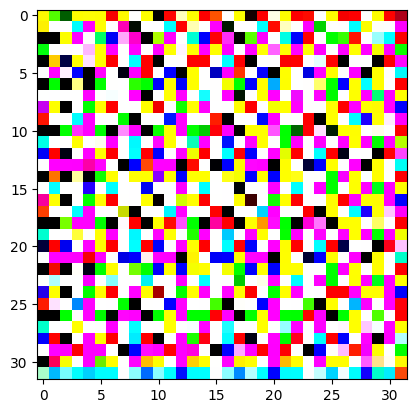

In [13]:
gen_imgs = (gen_imgs + 1) / 2.0
plt.imshow(gen_imgs[0])

# **LOGIKA PENJELASAN**
plt.imshow(gen_imgs[0]) → membuat objek gambar (itu yang ditampilkan sebagai <matplotlib.image.AxesImage ).

plt.show() → benar-benar menampilkan gambar di layar.

### **8) Making GIF**

In [14]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

  if filenames:  # Check if filenames is not empty
    image = imageio.imread(filenames[-1])
    writer.append_data(image)

/tmp/ipython-input-360815478.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipython-input-360815478.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filenames[-1])


# **LOGIKA PENJELASAN**
Potongan kode di atas digunakan untuk membuat animasi GIF dari seluruh hasil gambar yang telah dihasilkan oleh model GAN selama proses pelatihan. Pertama, kode mengambil semua file gambar .png dari folder generated_images menggunakan glob.glob(), kemudian mengurutkannya agar urutan gambar sesuai dengan proses epoch pelatihan. Setelah itu, dengan bantuan imageio.get_writer(), setiap gambar dibaca menggunakan imageio.imread() dan disusun menjadi satu file GIF bernama dcgan.gif. Proses ini memungkinkan pengguna untuk melihat perkembangan kualitas gambar yang dihasilkan oleh generator dari waktu ke waktu, sehingga memudahkan evaluasi visual terhadap kemajuan pelatihan model GAN.